In [1]:
import numpy as np
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6644\2631033805.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
conn = pyodbc.connect(
    '''
    DRIVER={ODBC Driver 17 for SQL Server};
    SERVER=DESKTOP-7CB1RAA;
    DATABASE=master;
    Trusted_Connection=yes;
    '''
    )

cursor = conn.cursor()

### Top 10 product sales

In [5]:
query1 = """
select p.Name, COUNT(s.ProductID) as prodCount 
from [CompanyX].[Sales].[SalesOrderDetail] as s
inner join [CompanyX].[Production].[Product] as p
	on s.ProductID = p.ProductID
group by p.Name
order by prodCount desc
"""

cursor.execute(query1)
result = cursor.fetchall()
newRes1 = pd.DataFrame(np.asarray(result), columns=['Product','Count'])
newRes1['Count'] = newRes1['Count'].astype(float)
# pd.to_numeric(newRes1['Count'], downcast='integer')

product = newRes1['Product'].head(10)
count = newRes1['Count'].head(10)

print(type(count[0]))


<class 'numpy.float64'>


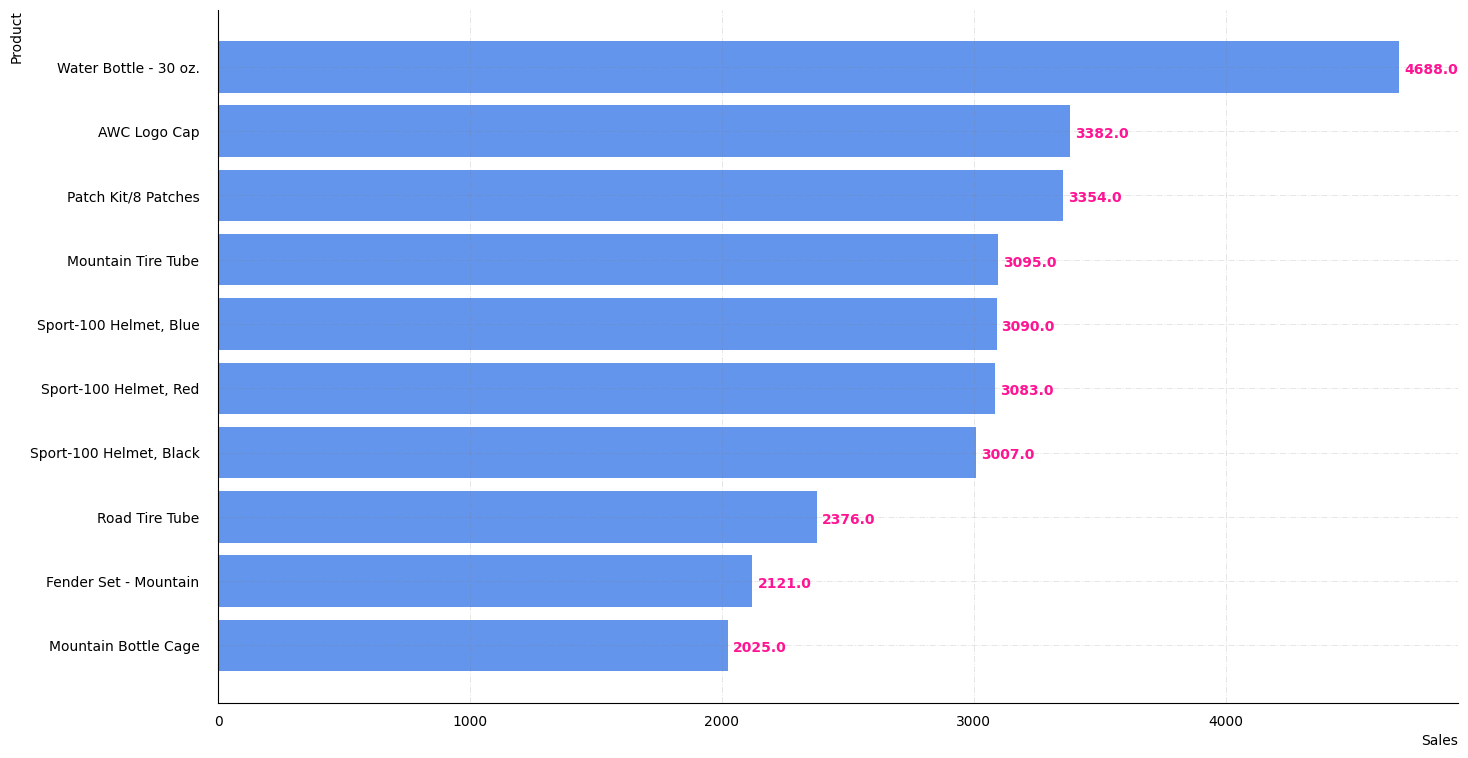

In [11]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
bars =  ax.barh(product, count, color='cornflowerblue')

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.7,alpha = 0.2)

# Show top values 
ax.invert_yaxis()

# plt.xlabel('Sales')
# plt.ylabel('Product')
ax.set_ylabel('Product', loc='top')
ax.set_xlabel('Sales', loc='right')

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='deeppink')

# Show Plot
plt.show()

